

```
# Isto está formatado como código
```
Programa de Pós-graduação em Ciência da Computação (PPCIC)
<br>
Centro Federal de Educação Tecnológica Celso Suckow da Fonseca – (CEFET/RJ)
<br>
Disciplina: Mineração de Texto
<br>
Prof.: Gustavo P. Guedes
<br>
Aluna: Érica Carneiro


# Import Bibliotecas 

In [ ]:
from google.colab import files

import pandas as pd
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.cluster import KMeans

from sklearn import svm
from sklearn.svm import SVC
from sklearn.naive_bayes import MultinomialNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import cross_validate
from sklearn.naive_bayes import GaussianNB



import numpy as np
import matplotlib.pyplot as plt
from PIL import Image
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator



RANDOM_STATE = 0 

# Upload de Arquivo

In [ ]:
# Upload MQD.txt
files.upload()

Saving tb.csv to tb.csv


{'tb.csv': b'"36","3","Oi querido di\xc3\xa1rio, mais uma vez estou aqui me sentindo uma merda e a culpa \xc3\xa9 toda minha!","-1"\n"37","3","\xc3\x89 maravilhoso saber que a cada dia estamos nos unindo cada vez mais.","1"\n"38","3","Na vida precisamos contar com o apoio daquela pessoa que escolhemos para partilhar de todos os nossos momentos.","0"\n"39","3","Estou muito feliz e espero que voc\xc3\xaa tamb\xc3\xa9m.","1"\n"40","3","Pra comemorar pedimos pizza, e eu fiz uma carta e deixei do lado dele da cama!","1"\n"41","2","N\xc3\xb3s possu\xc3\xadmos o ingrediente b\xc3\xa1sico que tudo sustentar\xc3\xa1 e que t\xc3\xa3o poucos tem o privilegio de ter: o Amor.","1"\n"42","3","Um brinde a nossa exist\xc3\xaancia, e ao nosso futuro.","1"\n"43","2","Hoje acaba uma guerra.","0"\n"44","2","N\xc3\xa3o acaba uma batalha, a guerra vai continuar, a guerra \xc3\xa9 destruir as correntes que me separam das minhas aspira\xc3\xa7\xc3\xb5es, que me separam dos meus sonhos.","0"\n"45","3","Sou mui

# Agrupamento e Classificação KMeans

In [ ]:
#file read
#pd = panda read = abre, verifica o encoding do arquivo
f = pd.read_csv("tb.csv", names = ["entrada", "juizes", "texto", "emo"])
f.head()

,entrada,juizes,texto,emo
0,36,3,"Oi querido diário, mais uma vez estou aqui me ...",-1
1,37,3,É maravilhoso saber que a cada dia estamos nos...,1
2,38,3,Na vida precisamos contar com o apoio daquela ...,0
3,39,3,Estou muito feliz e espero que você também.,1
4,40,3,"Pra comemorar pedimos pizza, e eu fiz uma cart...",1


In [ ]:
#retorna apenas a coluna selecionada (texto, no caso)
f["texto"]

0       Oi querido diário, mais uma vez estou aqui me ...
1       É maravilhoso saber que a cada dia estamos nos...
2       Na vida precisamos contar com o apoio daquela ...
3             Estou muito feliz e espero que você também.
4       Pra comemorar pedimos pizza, e eu fiz uma cart...
                              ...                        
1464    Hoje iniciei o dia conversando com o Gabriel, ...
1465    Mas ele é lindo, aquele sorriso, a forma como ...
1466    Mandei um e-mail para o meu "colega" na quarta...
1467    Não quero que me juguem, me xinguem ou coisa p...
1468    Não quero que me juguem, me xinguem ou coisa p...
Name: texto, Length: 1469, dtype: object

In [ ]:
#tem que incluir a variável do objeto (no caso do pandas, o dataframe (f))
corpus = f["texto"]
print(corpus)

0       Oi querido diário, mais uma vez estou aqui me ...
1       É maravilhoso saber que a cada dia estamos nos...
2       Na vida precisamos contar com o apoio daquela ...
3             Estou muito feliz e espero que você também.
4       Pra comemorar pedimos pizza, e eu fiz uma cart...
                              ...                        
1464    Hoje iniciei o dia conversando com o Gabriel, ...
1465    Mas ele é lindo, aquele sorriso, a forma como ...
1466    Mandei um e-mail para o meu "colega" na quarta...
1467    Não quero que me juguem, me xinguem ou coisa p...
1468    Não quero que me juguem, me xinguem ou coisa p...
Name: texto, Length: 1469, dtype: object


In [ ]:
#X é matriz, shape = atributo do objeto shape
vectorizer = TfidfVectorizer()
vect_f = vectorizer.fit_transform(corpus)
print(vectorizer.get_feature_names())
print(vect_f.shape)


['00', '03', '10', '100', '1000', '11', '12', '13', '14', '15', '16', '17', '19', '1º', '20', '2013', '21', '22', '24', '24hs', '27', '28', '29', '30', '35', '3ºano', '40', '42', '4º', '50', '56', '57', '5hrs', '60', '9h', 'abafar', 'abaixa', 'abaixo', 'abala', 'abandonada', 'abandonado', 'abandonar', 'abandonasse', 'abanou', 'abençoa', 'aberração', 'aberta', 'aberto', 'abertos', 'aberturas', 'abra', 'abracei', 'abraça', 'abraçado', 'abraçando', 'abraçar', 'abraçaram', 'abraço', 'abraços', 'abraçou', 'abre', 'abri', 'abria', 'abril', 'abrimos', 'abrindo', 'abrir', 'absolutamente', 'abóbora', 'acaba', 'acabado', 'acabamos', 'acabando', 'acabar', 'acabaram', 'acabarem', 'acabava', 'acabe', 'acabei', 'acabo', 'acabou', 'academia', 'acalmar', 'acalmo', 'acampamento', 'acariciar', 'acariciava', 'aceitar', 'aceitei', 'aceito', 'acelera', 'acelerada', 'acelerados', 'acendeu', 'acertar', 'acertaram', 'acertei', 'acertos', 'acesa', 'acha', 'acham', 'achamos', 'achando', 'achar', 'achava', 'ache

In [ ]:
#vect_df é um dataframe de X
vect_f = pd.DataFrame(X.toarray(), columns=vectorizer.get_feature_names())
fused_f = pd.concat([f, vect_f], axis=1)
#removendo variáveis dispensáveis
clean_f = fused_f.drop(columns=['texto','juizes','entrada'])

In [ ]:
#Retirando colunas para usar apenas as necessárias
features = clean_f[clean_f.columns.difference(['emo'])]
label = clean_f['emo'] 

#classical split
from sklearn.model_selection import train_test_split
features_train, features_test, label_train, label_test = train_test_split(features, label, test_size=0.3, random_state=42)

In [ ]:
#Classificação
from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters=3, random_state=0).fit(features)
fused_f['k_group'] = fused_f.apply(lambda vect_f: kmeans.predict(vect_f[features.columns].values.reshape(1,-1))[0], axis=1)

In [ ]:
print(fused_f['k_group'])

0       1
1       0
2       0
3       2
4       1
       ..
1464    1
1465    0
1466    1
1467    0
1468    0
Name: k_group, Length: 1469, dtype: int64


# Word Cloud

In [ ]:
!pip install wordcloud

In [ ]:
# Upload Stopwords_pt.txt
files.upload()

Saving stopw_pt.txt to stopw_pt (2).txt


{'stopw_pt.txt': b'  \r\nde\r\na\r\nas\r\nna \r\no \r\nque \r\ne\r\ndo \r\nda \r\nem \r\num \r\npara \r\n\xc3\xa9 \r\ncom \r\nn\xc3\xa3o \r\numa \r\nos \r\nno \r\nse \r\nna \r\npor \r\nmais \r\nas\r\ndos \r\ncomo \r\nmas \r\nfoi \r\nao \r\nele \r\ndas \r\ntem \r\n\xc3\xa0 \r\nseu \r\nsua \r\nou \r\nser \r\nquando \r\nmuito \r\nh\xc3\xa1 \r\nnos \r\nj\xc3\xa1 \r\nest\xc3\xa1 \r\neu \r\ntamb\xc3\xa9m \r\ns\xc3\xb3 \r\npelo \r\npela\r\npara \r\nat\xc3\xa9 \r\nisso \r\nela \r\nentre \r\nera \r\ndepois \r\nsem \r\nmesmo \r\naos \r\nter \r\nseus \r\nquem \r\nnas \r\nme \r\nesse \r\neles \r\nest\xc3\xa3o \r\nvoc\xc3\xaa \r\ntinha \r\nforam \r\nessa \r\nnum \r\nnem \r\nsuas \r\nmeu \r\n\xc3\xa0s \r\nminha \r\nt\xc3\xaam \r\nnuma \r\npelos \r\nelas \r\nhavia \r\nseja \r\nqual \r\nser\xc3\xa1 \r\nn\xc3\xb3s \r\ntenho \r\nlhe \r\ndeles \r\nessas \r\nesses \r\npelas \r\neste \r\nfosse \r\ndele \r\ntu \r\nte \r\nvoc\xc3\xaas \r\nvos \r\nlhes \r\nmeus \r\nminhas\r\nteu\r\ntua\r\nteus\r\ntuas\r\nnoss

In [ ]:
stop_df = pd.read_csv("stopw_pt.txt", names = ["stp"])
stp = [ s.strip() for s in stop_df['stp'].values.tolist()]

In [ ]:

import os

from os import path
from wordcloud import WordCloud
import matplotlib.pyplot as plt

#separando os textos por rótulo do kmeans
lista_0 = fused_f.query("k_group==0")['texto'].values.tolist()
lista_1 = fused_f.query("k_group==1")['texto'].values.tolist()
lista_2 = fused_f.query("k_group==2")['texto'].values.tolist()

#preparando para o wordcloud
text_0 = ''.join([str(x) for x in lista_0])
text_1 = ''.join([str(x) for x in lista_1])
text_2 = ''.join([str(x) for x in lista_2])

#gerando cada wordcloud
wordcloud_0 = WordCloud(stopwords=stp).generate(text_0)
wordcloud_1 = WordCloud(stopwords=stp).generate(text_1)
wordcloud_2 = WordCloud(stopwords=stp).generate(text_2)

Word Cloud Grupo 0

Word Cloud K_Group 0


(-0.5, 399.5, 199.5, -0.5)

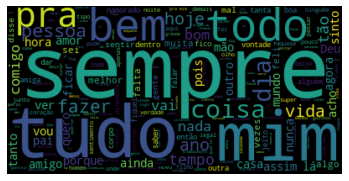

In [ ]:
#mostrando cada wordcloud
print("Word Cloud K_Group 0")
plt.imshow(wordcloud_0, interpolation='bilinear')
plt.axis("off")

Word Cloud Grupo 1

Word Cloud K_Group 1


(-0.5, 399.5, 199.5, -0.5)

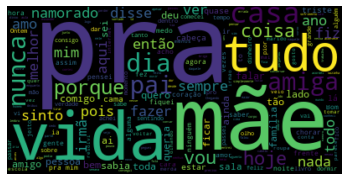

In [ ]:

print("Word Cloud K_Group 1")
plt.imshow(wordcloud_1, interpolation='bilinear')
plt.axis("off")

Word Cloud Grupo 2


Word Cloud K_Group 2


(-0.5, 399.5, 199.5, -0.5)

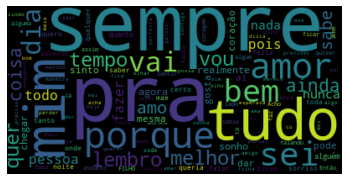

In [ ]:
print("Word Cloud K_Group 2")
plt.imshow(wordcloud_2, interpolation='bilinear')
plt.axis("off")

In [ ]:
import plotly.express as px

In [ ]:
px.histogram(fused_f, x = 'k_group', color='emo', title='Distribuição das emoções pelos Labels do Kmeans')

Ou seja, o Kmeans, arranjou um outro jeito de agrupar as frases, de modo que não é congruente com as emoções, mas, ao mesmo tempo mantendo uma certa estratificação.

# Classificação KNN, Naive Bayes e SVM

In [ ]:
knn = KNeighborsClassifier(n_neighbors=3)
gnb = GaussianNB()
svm = SVC(gamma='auto')

In [ ]:
scoring = [
    'accuracy',
    'f1_micro'
]

cv_knn = pd.DataFrame( cross_validate(knn, features, label, cv=5, scoring=scoring) )
cv_gnb = pd.DataFrame( cross_validate(gnb, features, label, cv=5, scoring=scoring) )
cv_svm = pd.DataFrame( cross_validate(svm, features, label, cv=5, scoring=scoring) )

# F1 KNN

In [ ]:
cv_knn

,fit_time,score_time,test_accuracy,test_f1_micro
0,0.411505,3.302143,0.506803,0.506803
1,0.400874,3.344285,0.530612,0.530612
2,0.395950,3.294485,0.435374,0.435374
3,0.398097,3.311509,0.472789,0.472789
4,0.393922,3.297718,0.532423,0.532423


# F1 Naive Bayes

In [ ]:
cv_gnb

,fit_time,score_time,test_accuracy,test_f1_micro
0,0.088684,0.026100,0.425170,0.425170
1,0.087448,0.025778,0.493197,0.493197
2,0.089069,0.026817,0.431973,0.431973
3,0.086374,0.025517,0.448980,0.448980
4,0.085234,0.025600,0.518771,0.518771


# F1 SVM

In [ ]:
cv_svm

,fit_time,score_time,test_accuracy,test_f1_micro
0,11.932113,2.347194,0.370748,0.370748
1,11.696908,2.332170,0.370748,0.370748
2,11.669695,2.314782,0.370748,0.370748
3,11.598043,2.323080,0.370748,0.370748
4,11.715750,2.354400,0.372014,0.372014


# Média Naive Bayes


In [ ]:
cv_gnb.mean()

fit_time         0.087362
score_time       0.025962
test_accuracy    0.463618
test_f1_micro    0.463618
dtype: float64

# Média KNN

In [ ]:
cv_knn.mean()

fit_time         0.400069
score_time       3.310028
test_accuracy    0.495600
test_f1_micro    0.495600
dtype: float64

# Média SVM

In [ ]:
cv_svm.mean()

fit_time         11.722502
score_time        2.334325
test_accuracy     0.371001
test_f1_micro     0.371001
dtype: float64